# Section 2: Datasets

In this section we introduce how to effectively create and read a dataset. We classified datasets in three formats:

* **Raw Data:** raw data are available the same way they were collected. For example: PE executables, ELF or APK packages;
* **Attributes:** filtered metadata extracted from the raw data with less noise and focus on the data that really matters. For example: CSV with metadata, execution logs of a sofware or data extracted from its header;
* **Features:** features extracted from the attributes or raw data ready to be used in a classifier. For example: feature vectors extracted from the attributes collected before.

With these definitions in mind, we will first introduce how to extract attributes from raw data. 

## Requirements:

* **Python Version**: make sure you are using **Python 3.5 or higher**.
* **Libraries:** all the python libraries used can be found in the file "requirements.txt". To install them, just run the following command (using pip): 
> *pip install -r requirements.txt*
* **Datasets:** the datasets located at folder "./datasets/" are going to be used in our entire course. They are all in .zip extension. When extracting, make sure the .csv are located in this same folder. To extract, use the following command from a terminal: 
> *unzip \<filename\>.zip*.

## Labeling Data

TODO

In [1]:
import requests, json
# virus total report api
url = 'https://www.virustotal.com/vtapi/v2/file/report'
# api key (change it to yours)
API_KEY = "<api_key>"
# parameters: apikey is your apikey; resource is the file md5/sha1/sha256
params = {'apikey': API_KEY, 'resource': '6545c6f328393f9b3168e260ae1b7135c1bfa917'}
# send request and get response
response = requests.get(url, params=params)
# write response in a json file
with open('samples.json', 'w') as outfile:
json.dump(response.json(), outfile)
# print output
print(response.json())

{'md5': 'ab243d1fad9ed1af747f313ec88b3fd0',
 'permalink': 'https://www.virustotal.com/file/6c7a2a4dae13df742a60c0fe3c1d319eaeb6f10eb63a10ea3cce234bbdc08c9e/analysis/1521947751/',
 'positives': 48,
 'resource': '6545c6f328393f9b3168e260ae1b7135c1bfa917',
 'response_code': 1,
 'scan_date': '2018-03-25 03:15:51',
 'scan_id': '6c7a2a4dae13df742a60c0fe3c1d319eaeb6f10eb63a10ea3cce234bbdc08c9e-1521947751',
 'scans': {'ALYac': {'detected': True,
   'result': 'Trojan.ScriptKD.4189',
   'update': '20180325',
   'version': '1.1.1.5'},
  'AVG': {'detected': True,
   'result': 'FileRepMalware',
   'update': '20180325',
   'version': '18.2.3827.0'},
  'AVware': {'detected': True,
   'result': 'Trojan.Win32.Meredrop',
   'update': '20180325',
   'version': '1.5.0.42'},
  'Ad-Aware': {'detected': True,
   'result': 'Trojan.ScriptKD.4189',
   'update': '20180325',
   'version': '3.0.3.1010'},
  'AegisLab': {'detected': True,
   'result': 'Troj.W32.Agent!c',
   'update': '20180325',
   'version': '4.2'}

After saving all the reports in a file (in our case, "*samples.json*"), clone [AVClass repository](https://github.com/malicialab/avclass) and execute the following command:

> ./avclass_labeler.py -vt samples.json -v -fam > samples.labels

This is going to create three files:
* **samples.verbose**: created due to the parameter *-v*, which contains all families extracted for each sample ranked by the number of AV engines that use that family;
* **samples.families**: created due to the parameter *-fam*, which contains a ranking of the families assigned to the input samples;
* **samples.labels**: created as output, which contains the corresponding family of each input sample.

## Reading a Dataset

TODO

### Brazilian Malware

TODO

In [1]:
import pandas as pd
# dataset location
data_path = "./datasets/brazilian-malware.csv"
# read CSV dataset
data = pd.read_csv(data_path)

In [2]:
data.shape

(50181, 28)

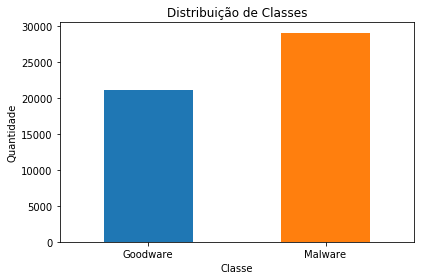

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# group data by label and create a bar plot
ax = data['Label'].groupby(
     data["Label"]).count().plot(kind="bar")
# set x label
ax.set_xlabel("Classe")
# set y label
ax.set_ylabel("Quantidade")
# set x tick labels and set it in horizontal position
ax.set_xticklabels(["Goodware", "Malware"], rotation='horizontal')
# set plot title
ax.set_title("Distribuição de Classes")
# savefig and show plot
fig.tight_layout()
plt.savefig("distribution_brmw.pdf")
plt.show()

In [4]:
data['FirstSeenDate'] =  pd.to_datetime(data['FirstSeenDate'])
data = data.sort_values(by='FirstSeenDate')

In [5]:
data

,BaseOfCode,BaseOfData,Characteristics,DllCharacteristics,Entropy,FileAlignment,FirstSeenDate,Identify,ImageBase,ImportedDlls,...,PointerToSymbolTable,SHA1,Size,SizeOfCode,SizeOfHeaders,SizeOfImage,SizeOfInitializedData,SizeOfOptionalHeader,SizeOfUninitializedData,TimeDateStamp
0,4096,69632,783,0,5.981249,512,1970-01-01,[['PowerBASIC/Win 8.00']],4194304,"['COMDLG32.DLL', 'GDI32.DLL', 'KERNEL32.DLL', ...",...,0,b0068836a40e6a43c6b546fcb709237e5aa223d1,76288,64855,1024,86016,2560,224,1500,12345
1,4096,1851392,783,0,6.081747,512,1970-01-01,NaN,4194304,"['comctl32.dll', 'comdlg32.dll', 'gdi32.dll', ...",...,0,5741708cd785f13b44267883e3f2fd2fa51fc23f,2558464,1843888,1024,2600960,500348,224,21476,0
2,4096,40960,783,0,5.586422,512,1970-01-01,NaN,4194304,"['COMDLG32.DLL', 'KERNEL32.dll', 'msvcrt.dll',...",...,0,507fe5d8244f33d29d427468efca4ce406f23666,178688,33792,1024,33759232,177664,224,33557504,0
3,1359872,2138112,783,0,7.969464,512,1970-01-01,"[['UPX 2.93 - 3.00 [LZMA] -> Markus Oberhumer,...",4194304,"['KERNEL32.DLL', 'ADVAPI32.dll', 'COMDLG32.DLL...",...,0,e51a7811464be1acadf6e72ba3a66aba0da438cd,806816,778240,4096,2166784,28672,224,1355776,0
4,4096,40960,783,32768,7.999900,512,1970-01-01,NaN,4194304,"['ADVAPI32.dll', 'COMCTL32.DLL', 'GDI32.dll', ...",...,0,0e046d9903c313ffeeb0d6392335437fe881b1f5,50689096,35840,1024,303104,38912,224,110080,0
5,192512,245760,783,0,7.328245,512,1970-01-01,"[['UPX v0.89.6 - v1.02 / v1.05 - v1.22', 'UPX ...",4194304,"['KERNEL32.DLL', 'ADVAPI32.DLL', 'COMCTL32.DLL...",...,0,19de46452aca94ad64c28a265ab837e79fe9e588,76800,53248,4096,270336,24576,224,188416,12345
6,8192,61440,33166,0,6.257786,512,1970-01-01,NaN,4194304,"['KERNEL32.DLL', 'USER32.DLL']",...,0,f6e0452325d7d325d802fbb1aa367cec50c37a03,69660,52224,1024,147456,77824,224,0,0
7,4096,40960,775,0,5.308237,512,1970-01-03,NaN,4194304,"['lua53.dll', 'KERNEL32.dll', 'msvcrt.dll', 'm...",...,75264,56e362bc399f7f2e5beb8ef8ed7b7198d8488461,110146,34304,1024,102400,74240,224,3072,196608
8,4096,40960,775,0,5.256822,512,1970-01-03,NaN,4194304,"['lua53.dll', 'KERNEL32.dll', 'msvcrt.dll', 'm...",...,73728,01a8b85f2835190a4f3066e4ed3d4555788f4ccb,107962,34304,1024,98304,72704,224,3072,196608
9,4096,131072,775,0,5.909817,512,1970-01-04,NaN,4194304,"['KERNEL32.dll', 'msvcrt.dll', 'msvcrt.dll']",...,194560,1bad4f17d48cfc6f0a15759df5e545e161c4b01b,246187,123392,1024,225280,193536,224,3072,327680


In [6]:
data['Label'].groupby(data["Label"]).count()

Label
0    21116
1    29065
Name: Label, dtype: int64

In [9]:
data[data['Label'] != 1]["SHA1"]

0        b0068836a40e6a43c6b546fcb709237e5aa223d1
1        5741708cd785f13b44267883e3f2fd2fa51fc23f
2        507fe5d8244f33d29d427468efca4ce406f23666
3        e51a7811464be1acadf6e72ba3a66aba0da438cd
4        0e046d9903c313ffeeb0d6392335437fe881b1f5
5        19de46452aca94ad64c28a265ab837e79fe9e588
6        f6e0452325d7d325d802fbb1aa367cec50c37a03
7        56e362bc399f7f2e5beb8ef8ed7b7198d8488461
8        01a8b85f2835190a4f3066e4ed3d4555788f4ccb
9        1bad4f17d48cfc6f0a15759df5e545e161c4b01b
10       8a1b82844862744c7093f1afbf9f5c6ed2bddae6
12       410818710f2a000b52841af978bb958744a8747e
11       d5a4e36e9615aac45955cca9fe3087480b7dca3c
13       12a5489dbf0249494ade54228f4706022201c18e
14       f5867990bab666adda45575ed18ca517d3524086
15       7bd53b19c8d2c0a942dc386c33d52872ab6cd6e2
16       f15fa12bbbe21701192a516135207c368b4f7806
17       0ff72230a8c4c38ceedea18ae0dd0a169c2f4910
915      57b85ddc02352c0993cf163a7d3691592322f645
921      90cb0fef0d50ebd052b1c7b22942ba3eb135113d


In [17]:
step = 5000
for num, i in enumerate(range(0,data.shape[0],step)):
    print(num, sp.shape)
    sp = data[i:i+step]
    sp.to_csv("brmw_{}.csv".format(num), index=False)

0 (5000, 28)
1 (5000, 28)
2 (5000, 28)
3 (5000, 28)
4 (5000, 28)
5 (5000, 28)
6 (5000, 28)
7 (5000, 28)
8 (5000, 28)
9 (5000, 28)
10 (5000, 28)


### Drebin

TODO

In [18]:
import pandas as pd
# dataset location
data_path_2 = "./datasets/drebin-drift.csv"
# read CSV dataset
data_drebin = pd.read_csv(data_path_2)

In [20]:
data_drebin[:1]

,sha256,submission_date,api_call,permission,url,provider,feature,intent,activity,call,service_receiver,real_permission,label,family
0,a44a4856e27a0f8448a12f445b46d9430b93fd15414b04...,2009-06-08 02:21:25,android/media/MediaPlayer->start android/app/A...,android.permission.VIBRATE,NaN,NaN,android.hardware.touchscreen,android.intent.action.MAIN android.intent.cate...,.FlAndroidApp FlAndroidApp,getSystemService,NaN,android.permission.INTERNET android.permission...,0,goodware


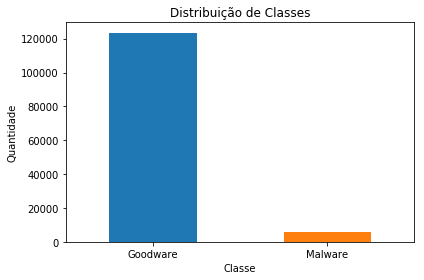

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# group data by label and create a bar plot
ax = data_drebin['label'].groupby(
     data_drebin["label"]).count().plot(kind="bar")
# set x label
ax.set_xlabel("Classe")
# set y label
ax.set_ylabel("Quantidade")
# set x tick labels and set it in horizontal position
ax.set_xticklabels(["Goodware", "Malware"], rotation='horizontal')
# set plot title
ax.set_title("Distribuição de Classes")
# savefig and show plot
fig.tight_layout()
plt.savefig("distribution_drebin.pdf")
plt.show()